In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

## Опис Даних

In [2]:
# Load the dataset
df = pd.read_csv('internet_service_churn.csv')

In [3]:
df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [4]:
df.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.227400e+04,72274.000000,72274.000000,72274.000000,72274.000000,50702.000000,72274.000000,71893.000000,71893.000000,72274.000000,72274.000000
mean,8.463182e+05,0.815259,0.334629,2.450051,18.942483,0.716039,0.274234,43.689911,4.192076,0.207613,0.554141
std,4.891022e+05,0.388090,0.471864,2.034990,13.215386,0.697102,0.816621,63.405963,9.818896,0.997123,0.497064
min,1.500000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222165e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,8.477840e+05,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.269562e+06,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


In [3]:
df['reamining_contract'] = df['reamining_contract'].fillna(0)
df['download_avg'] = df['download_avg'].fillna(df['download_avg'].mean())
df['upload_avg'] = df['upload_avg'].fillna(df['upload_avg'].mean())

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           72274 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 72274 non-null  float64
 8   upload_avg                   72274 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


In [ ]:
# Missing values check
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values[missing_values > 0])

## Аналіз Даних

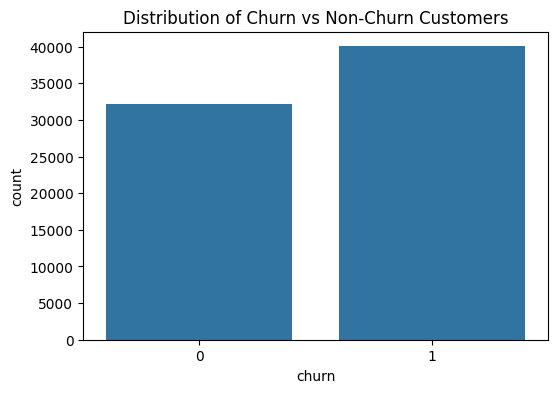

In [24]:
# Distribution of churn vs non-churn customers
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='churn')
plt.title('Distribution of Churn vs Non-Churn Customers')
plt.show()

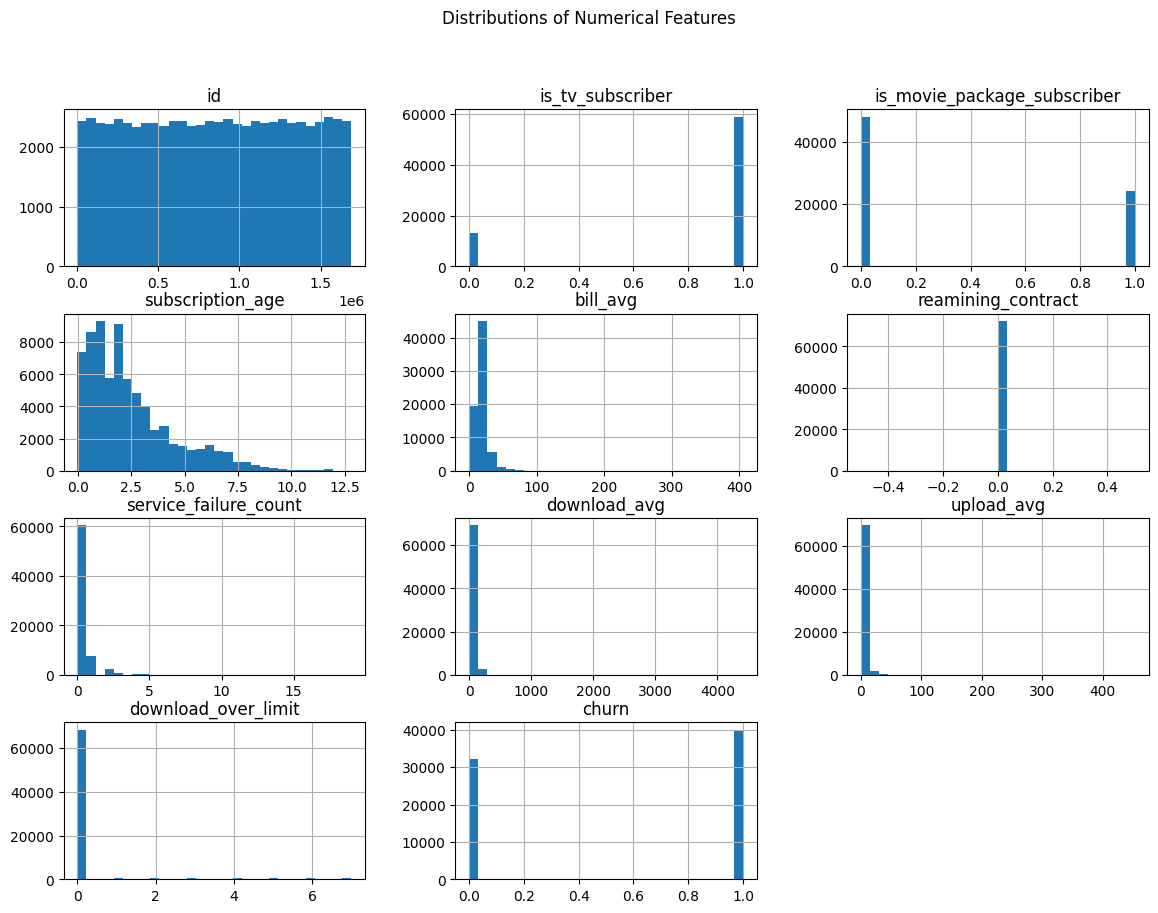

In [25]:
# Distribution of numerical features
df.hist(bins=30, figsize=(14, 10))
plt.suptitle('Distributions of Numerical Features')
plt.show()

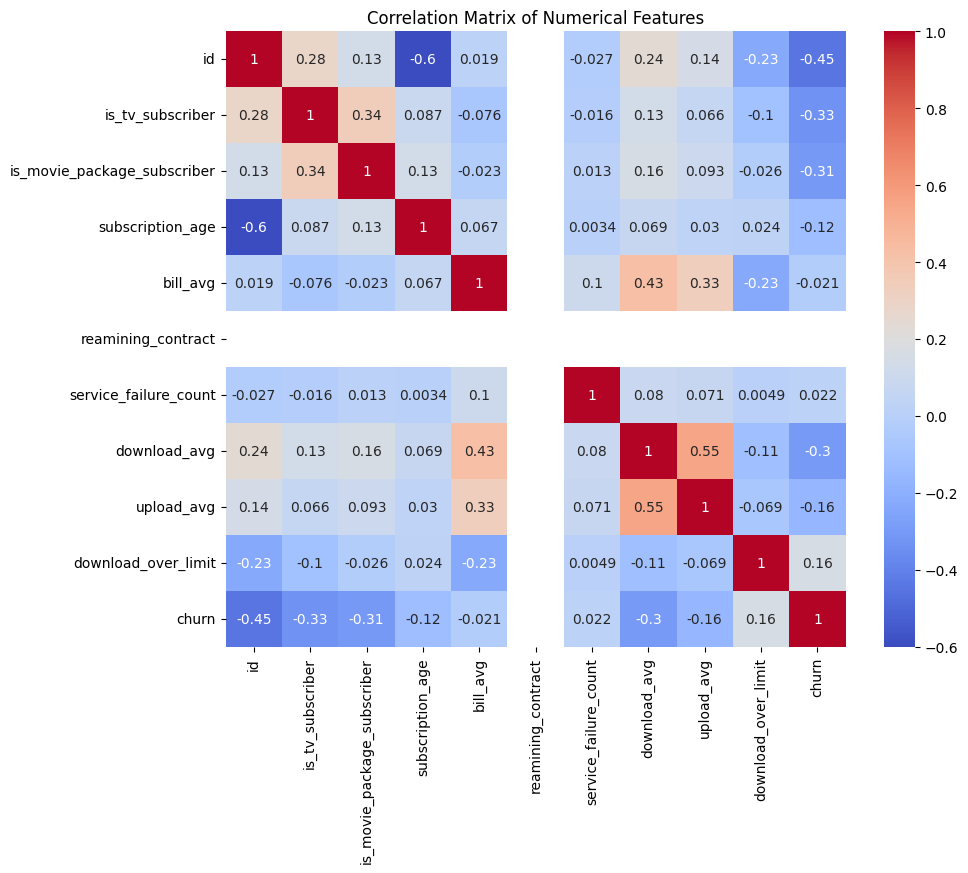

In [27]:
# Correlation matrix for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [31]:
# # Handling missing values: Removing rows with missing values
# df.dropna(inplace=True)
# # Encoding categorical variables using LabelEncoder or OneHotEncoder
# # Example: using LabelEncoder for the 'Churn' column (binary)
# le = LabelEncoder()
# df['Churn'] = le.fit_transform(df['Churn'])
# # OneHotEncoding for other categorical features
# df = pd.get_dummies(df, drop_first=True)

# Splitting the data into features and target
X = df.drop(columns=['churn'])  # Features
y = df['churn']  # Target variable

# Normalizing/Standardizing the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
# Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [33]:
# 5. Розробка Моделі

# Choosing a model (Random Forest Classifier in this case)
rf_model = RandomForestClassifier(random_state=42)

# Cross-validation to evaluate the model
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"Cross-validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean()}")

# Training the model on the training set
rf_model.fit(X_train, y_train)

Cross-validation Accuracy Scores: [0.94188862 0.94586648 0.94024559 0.9447423  0.94620773]
Mean Accuracy: 0.9437901454121681


RandomForestClassifier(random_state=42)

In [34]:
# 6. Оцінювання Моделі

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Accuracy, Recall, Precision, and F1 Score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9460
Recall: 0.9148
Precision: 0.9853
F1 Score: 0.9487


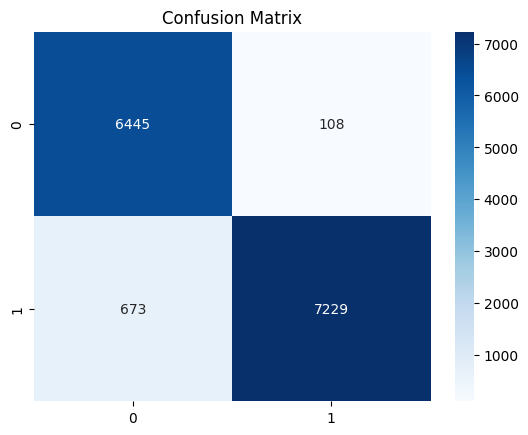


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      6553
           1       0.99      0.91      0.95      7902

    accuracy                           0.95     14455
   macro avg       0.95      0.95      0.95     14455
weighted avg       0.95      0.95      0.95     14455



In [35]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

## Train

In [4]:
def train_models_with_grid_search(X, Y):
    # Split the data into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    # Define the models and their hyperparameters for grid search
    models_and_params = {
        'Logistic Regression': (LogisticRegression(max_iter=1000), {
            'C': [0.1, 1.0, 10],
            'solver': ['lbfgs', 'liblinear']
        }),
        'Random Forest': (RandomForestClassifier(), {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10],
            'min_samples_split': [2, 5]
        }),
        'Gradient Boosting': (GradientBoostingClassifier(), {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.1, 0.05],
            'max_depth': [3, 5]
        }),
        'K-Nearest Neighbors': (KNeighborsClassifier(), {
            'n_neighbors': [5, 10],
            'weights': ['uniform', 'distance']
        }),
        'Support Vector Machine': (SVC(), {
            'C': [0.1, 1.0],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }),
        'Neural Network': (MLPClassifier(max_iter=1000), {
            'hidden_layer_sizes': [(100,), (100, 50)],
            'activation': ['relu', 'tanh'],
            'solver': ['adam', 'sgd']
        })
    }
    
    best_models_results = {}

    # Iterate through each model and hyperparameter combination
    for model_name, (model, params) in models_and_params.items():
        print(f"Performing grid search for {model_name}...")
        
        # Perform grid search with cross-validation
        grid_search = GridSearchCV(model, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
        grid_search.fit(X_train, Y_train)
        
        # Get the best model from grid search
        best_model = grid_search.best_estimator_
        Y_pred = best_model.predict(X_test)
        
        # Evaluate the best model
        accuracy = accuracy_score(Y_test, Y_pred)
        precision = precision_score(Y_test, Y_pred)
        recall = recall_score(Y_test, Y_pred)
        f1 = f1_score(Y_test, Y_pred)
        
        # Store results for the best model
        best_models_results[model_name] = {
            'Best Hyperparameters': grid_search.best_params_,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        }
        
        print(f"Best model for {model_name} found with parameters: {grid_search.best_params_}")
        print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}\n")
    
    return best_models_results

In [5]:
# Splitting the data into features and target
X = df.drop(columns=['churn'])  # Features
Y = df['churn']  # Target variable

# Normalizing/Standardizing the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
best_results = train_models_with_grid_search(X_scaled, Y)

Performing grid search for Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best model for Logistic Regression found with parameters: {'C': 10, 'solver': 'liblinear'}
Accuracy: 0.8987, Precision: 0.9117, Recall: 0.9019, F1 Score: 0.9068

Performing grid search for Random Forest...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best model for Random Forest found with parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy: 0.9449, Precision: 0.9526, Recall: 0.9463, F1 Score: 0.9495

Performing grid search for Gradient Boosting...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best model for Gradient Boosting found with parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Accuracy: 0.9759, Precision: 0.9783, Recall: 0.9775, F1 Score: 0.9779

Performing grid search for K-Nearest Neighbors...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best model for K-Nearest Neighbo

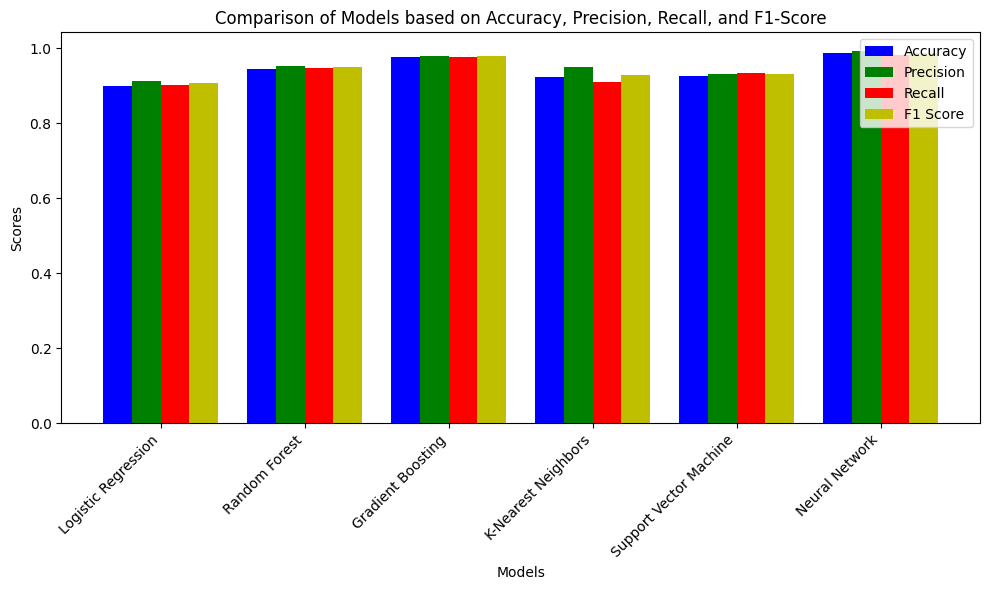

In [9]:
def plot_best_model_results(best_results):
    # Extract metrics for each model
    model_names = list(best_results.keys())
    accuracies = [best_results[model]['Accuracy'] for model in model_names]
    precisions = [best_results[model]['Precision'] for model in model_names]
    recalls = [best_results[model]['Recall'] for model in model_names]
    f1_scores = [best_results[model]['F1 Score'] for model in model_names]

    # Plot the metrics
    x = np.arange(len(model_names))  # Label locations
    width = 0.2  # Width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.bar(x - 1.5 * width, accuracies, width, label='Accuracy', color='b')
    ax.bar(x - 0.5 * width, precisions, width, label='Precision', color='g')
    ax.bar(x + 0.5 * width, recalls, width, label='Recall', color='r')
    ax.bar(x + 1.5 * width, f1_scores, width, label='F1 Score', color='y')

    ax.set_xlabel('Models')
    ax.set_ylabel('Scores')
    ax.set_title('Comparison of Models based on Accuracy, Precision, Recall, and F1-Score')
    ax.set_xticks(x)
    ax.set_xticklabels(model_names, rotation=45, ha='right')
    ax.legend()

    plt.tight_layout()
    plt.show()


plot_best_model_results(best_results)